Name: Lê Hoàng Anh Đức
ID: 11219268
Class: DSEB 63

In [1]:
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Warning Removal
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [3]:
from matplotlib import pyplot
# load dataset
dataset = pd.read_csv('D:\\Năm 3 - HK1\\Visualize\Ex\\pima-indians-diabetes.csv', header=None)

In [4]:
dataset

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
dataset.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [6]:
dataset[8].unique()

array([1, 0], dtype=int64)

In [7]:
# explore the scaling range of the robust scaler transform

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) #make sure each part is differ in distribution
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
# define dataset
X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1]
# get the models to evaluate
model = KNeighborsClassifier()  
# evaluate the model
scores = evaluate_model(model, X, y)  #đánh giá mô hình dựa trên k-nearest nneighbor
# tìm k mẫu gần nhất với mẫu cần dự đoán=> gán nhãn

In [8]:
scores

array([0.75324675, 0.7012987 , 0.67532468, 0.76623377, 0.74025974,
       0.80519481, 0.71428571, 0.7012987 , 0.72368421, 0.68421053,
       0.64935065, 0.67532468, 0.68831169, 0.75324675, 0.7012987 ,
       0.74025974, 0.64935065, 0.76623377, 0.75      , 0.73684211,
       0.71428571, 0.64935065, 0.68831169, 0.7012987 , 0.75324675,
       0.7012987 , 0.7012987 , 0.77922078, 0.76315789, 0.69736842])

In [9]:
mean(scores)

0.7174698108908635

In [10]:
# có 4 pp cải thiện độ chính xác
# Chuẩn hóa dữ liệu (Standardization/Normalization)
# Khử nhiễu dữ liệu (outliner)
# Tính toán các đặc trưng mới ? chưa học
# Tái phân phối dữ liệu (oversampling/undersampling)

In [11]:
def visual_data(x):
    fig, ax = plt.subplots(1,2,figsize=(12,5))
    ax[0].hist(x)
    sns.boxplot(x,ax=ax[1])
    plt.tight_layout()
    return fig.show()

In [12]:
#RobustScaler without filter outliner
scaler = RobustScaler()
newX = scaler.fit_transform(X)
scores = evaluate_model(model, newX, y)
mean(scores)

0.7335269993164731

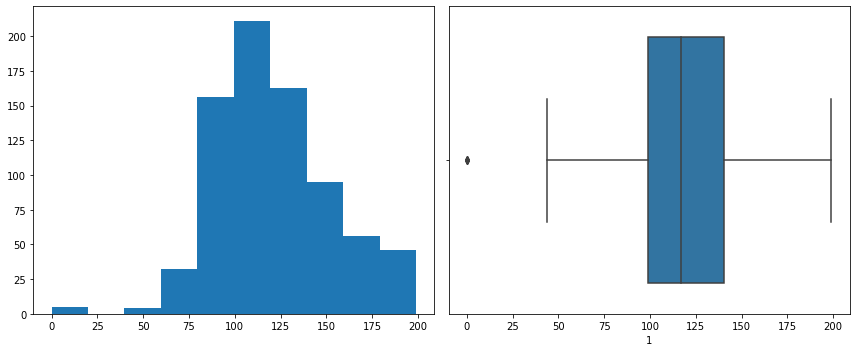

In [13]:
visual_data(X[1]) #standardization

In [14]:
new = dataset[dataset[1]>25]

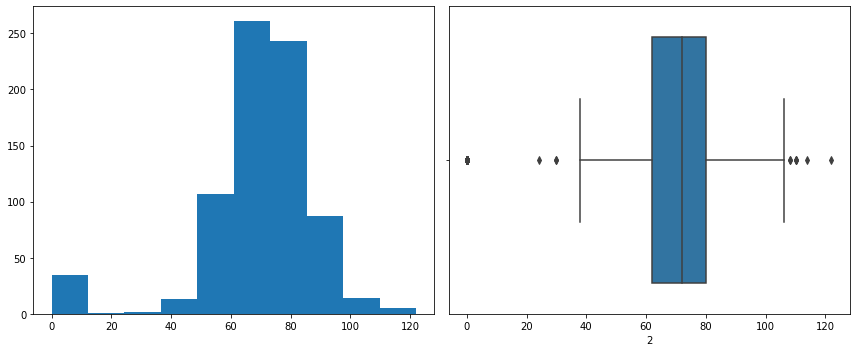

In [15]:
visual_data(X[2]) #standardizattion

In [16]:
new= new[(new[2]>30) & (new[2]<106)]

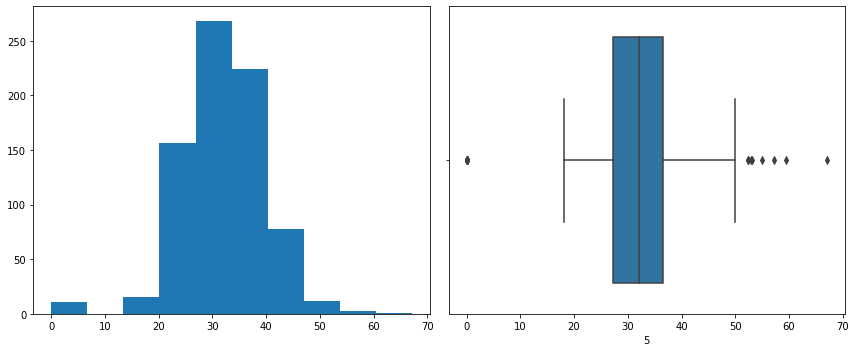

In [17]:
visual_data(X[5]) #standardization

In [18]:
new= new[(new[5]>10) & (new[5]<51)]

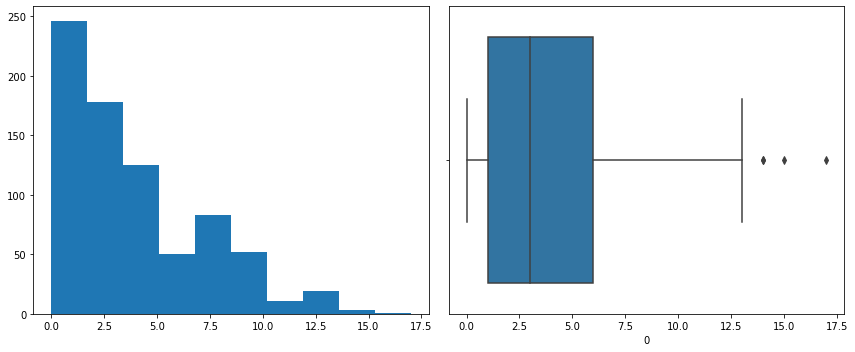

In [19]:
visual_data(X[0])

In [20]:
new= new[new[0]<14]

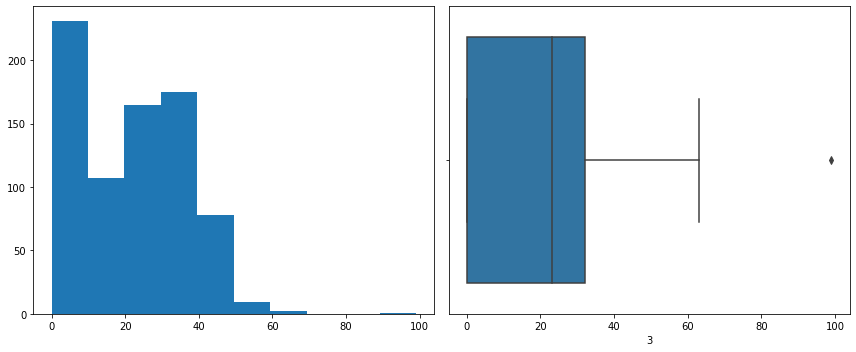

In [21]:
visual_data(X[3]) #normalization

In [22]:
new= new[new[3]<70]

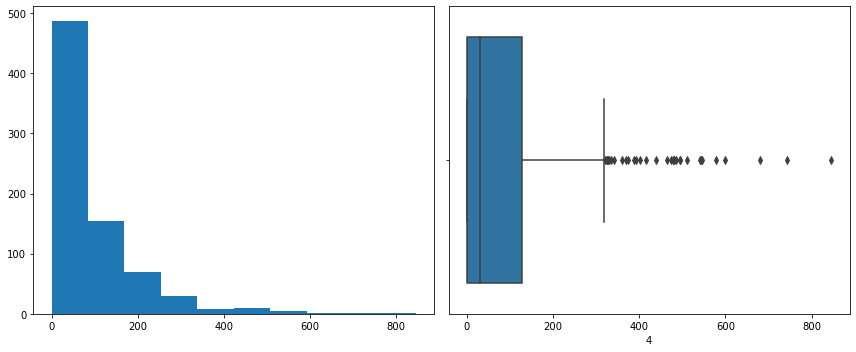

In [23]:
visual_data(X[4]) #normalization

In [24]:
new= new[new[4]<320]

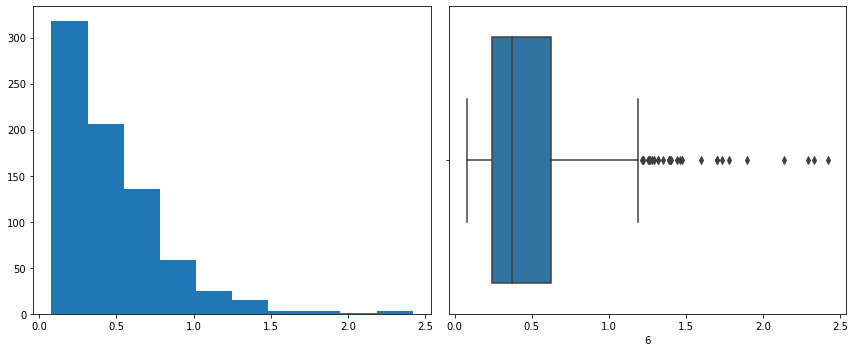

In [25]:
visual_data(X[6]) #normalization

In [26]:
new= new[new[6]<1.2]

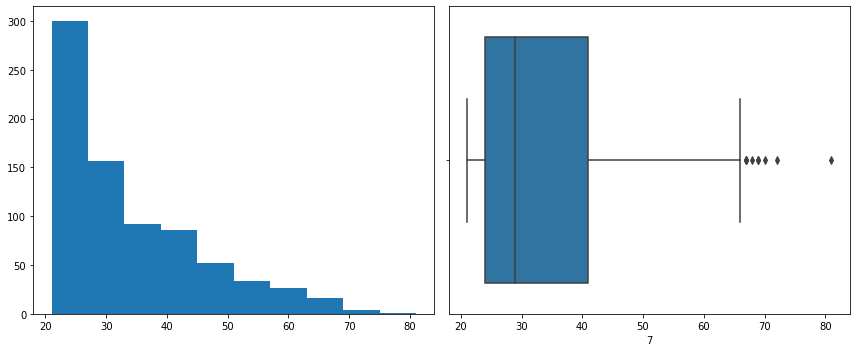

In [27]:
visual_data(X[7]) #normalization

In [28]:
new= new[new[7]<67]

In [29]:
# Evaluate without scaling after filter outliner
X, y = new.iloc[:, :-1], new.iloc[:, -1]
scores = evaluate_model(model, X, y)
print(mean(scores))

0.7373925264550266


In [30]:
# Robust scaling after drop outliner
newX = scaler.fit_transform(X)
scores = evaluate_model(model, newX, y)
mean(scores)

0.753116732804233

In [31]:
#Combine Standardize and Normalize

# Standardize colums 1, 2, 5
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X[1]=scaler.fit_transform(np.array(X[1]).reshape(-1,1))
X[2]=scaler.fit_transform(np.array(X[2]).reshape(-1,1))
X[5]=scaler.fit_transform(np.array(X[5]).reshape(-1,1))

# Normalize columns 0, 3, 4, 6, 7
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

X[0]=scaler.fit_transform(np.array(X[0]).reshape(-1,1))
X[3]=scaler.fit_transform(np.array(X[3]).reshape(-1,1))
X[4]=scaler.fit_transform(np.array(X[4]).reshape(-1,1))
X[6]=scaler.fit_transform(np.array(X[6]).reshape(-1,1))
X[7]=scaler.fit_transform(np.array(X[7]).reshape(-1,1))

In [32]:
scores = evaluate_model(model, X, y)
mean(scores)

0.7452546296296297

In [33]:
# Normalize after drop outliner
X, y = new.iloc[:, :-1], new.iloc[:, -1]
newX = scaler.fit_transform(X)
scores = evaluate_model(model, newX, y)
print(mean(scores))

0.7426835317460319


In [34]:
#Standarđize after drop outliner
scaler = StandardScaler()
X, y = new.iloc[:, :-1], new.iloc[:, -1]
newX = scaler.fit_transform(X)
scores = evaluate_model(model, newX, y)
print(mean(scores))

0.7494791666666668


The best solution is using RobustScaling after drop all outliner (75,31%)

In [35]:
scaler = RobustScaler()
new.iloc[:, :-1] = scaler.fit_transform(new.iloc[:, :-1])
new.to_pickle('D:\\Năm 3 - HK1\\Visualize\Ex\\LêHoàngAnhĐức_111219268_scaler.pkl')